In [92]:
#基本库
import pandas as pd
import numpy as np
import random as rnd
import os
import pickle
import random

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 消除警告
import warnings
warnings.filterwarnings('ignore')

# 机器学习模型
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression # 逻辑回归模型
from sklearn.svm import SVC,LinearSVC # 线性分类支持向量机
from sklearn.ensemble import RandomForestClassifier # 随机森林分类模型
from sklearn.neighbors import KNeighborsClassifier # K近邻分类模型
from sklearn.naive_bayes import GaussianNB # 贝叶斯分类模型
from sklearn.linear_model import Perceptron # 感知机模型
from sklearn.linear_model import SGDClassifier # 梯度下降算法
from sklearn.tree import DecisionTreeClassifier # 决策树模a型
from sklearn.model_selection import KFold # K-fold

In [93]:
import jupyter_ai
%reload_ext jupyter_ai_magics
%reload_ext dotenv
%dotenv /root/key.env
%ai list

cannot find .env file


| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-tg1-large`, `bedrock:anthropic.claude-v1`, `bedrock:anthropic.claude-instant-v1`, `bedrock:anthropic.claude-v2`, `bedrock:ai21.j2-jumbo-instruct`, `bedrock:ai21.j2-grande-instruct` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-2`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0` |
| `azure-chat-openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:medium`, `cohere:xlarge` |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `gpt4all:ggml-gpt4all-j-v1.2-jazzy`, `gpt4all:ggml-gpt4all-j-v1.3-groovy`, `gpt4all:ggml-gpt4all-l13b-snoozy` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See https://huggingface.co/models for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-16k`, `openai-chat:gpt-3.5-turbo-0301`, `openai-chat:gpt-3.5-turbo-0613`, `openai-chat:gpt-3.5-turbo-16k-0613`, `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-0613`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-4-32k-0613` |
| `openai-chat-new` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat-new:gpt-3.5-turbo`, `openai-chat-new:gpt-3.5-turbo-16k`, `openai-chat-new:gpt-3.5-turbo-0301`, `openai-chat-new:gpt-3.5-turbo-0613`, `openai-chat-new:gpt-3.5-turbo-16k-0613`, `openai-chat-new:gpt-4`, `openai-chat-new:gpt-4-0314`, `openai-chat-new:gpt-4-0613`, `openai-chat-new:gpt-4-32k`, `openai-chat-new:gpt-4-32k-0314`, `openai-chat-new:gpt-4-32k-0613` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must include the `--region_name`, `--request_schema`, and the `--response_path` arguments. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


In [94]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=998244353)
path = './data/zhongyi/'
x_train = pd.read_csv(path+'train_data.csv')
y_train = pd.read_csv(path+'train_label.csv')
x_test = pd.read_csv(path+'test_data.csv')
y_test = pd.read_csv(path+'test_label.csv')

In [95]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1137, 536), (1137, 10), (284, 536), (284, 10))

In [96]:
train_df = pd.concat([x_train, y_train],axis=1) #先将字段全并在一起
train_df.head()

,commonXingb,commonNl,commonSg,commonTz,commonStFz,commonQx,commonQxYn,commonSm,commonSmRskn,commonSmYx,...,commonDiseaseCode,commonTzPhz,commonTzQxz,commonTzYaxz,commonTzYixz,commonTzTsz,commonTzSrz,commonTzXyz,commonTzQyz,commonTzTbz
0,0,0.629630,0.890244,0.505882,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.864198,0.829268,0.270588,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0.802469,0.878049,0.305882,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0.617284,0.756098,0.270588,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0.493827,0.682927,0.435294,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
# 这个地方得跑很久
'''
train_df.head()
colormap = plt.cm.RdBu
plt.figure(figsize=(100,80))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
sns.set(font_scale=0.6)
plt.show()
'''

# PCA降维
546个字段的数据集我们是很难在热图中挖掘主要特征的，
所以我们需要先对数据集进行降维，采用先采用PCA方法

In [97]:
# pca 降维
from sklearn.decomposition import PCA

def PCA_process(data,pre,n):
    pca = PCA(n_components = n)
    new_data = pca.fit_transform(data)
    new_data = pd.DataFrame(new_data,columns = [f'{pre}{i+1}' for i in range(n)])
    return new_data
    
pca_x_train = PCA_process(x_train,'x',30)
#pca_y_train = PCA_process(y_train,'y',10)
train_df = pd.concat([pca_x_train, y_train],axis=1) #先将字段全并在一起
train_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,commonDiseaseCode,commonTzPhz,commonTzQxz,commonTzYaxz,commonTzYixz,commonTzTsz,commonTzSrz,commonTzXyz,commonTzQyz,commonTzTbz
0,-0.396724,-1.395506,-0.795384,-0.534592,-1.159966,1.914106,0.381858,1.708384,-1.774956,-0.573551,...,0,0,1,0,0,0,0,0,0,0
1,-2.182196,-1.272119,-1.219480,1.927462,-0.434386,1.074657,-0.647712,-0.630211,0.465381,0.249781,...,0,1,0,0,0,0,0,0,0,0
2,-3.536376,0.298470,-0.816889,-0.288536,-0.754158,-0.309717,0.215468,0.461274,0.028743,-0.123939,...,0,1,0,0,0,0,0,0,0,0
3,-2.041945,-1.588906,-2.367885,0.505522,0.032342,-0.131030,1.407621,0.492181,-1.164962,0.781498,...,0,0,0,0,0,0,1,0,0,0
4,-0.622289,0.403695,1.307601,-1.500248,-1.064231,-1.154396,-0.444304,-0.898158,-0.141521,0.563383,...,1,0,0,1,0,0,0,0,0,0


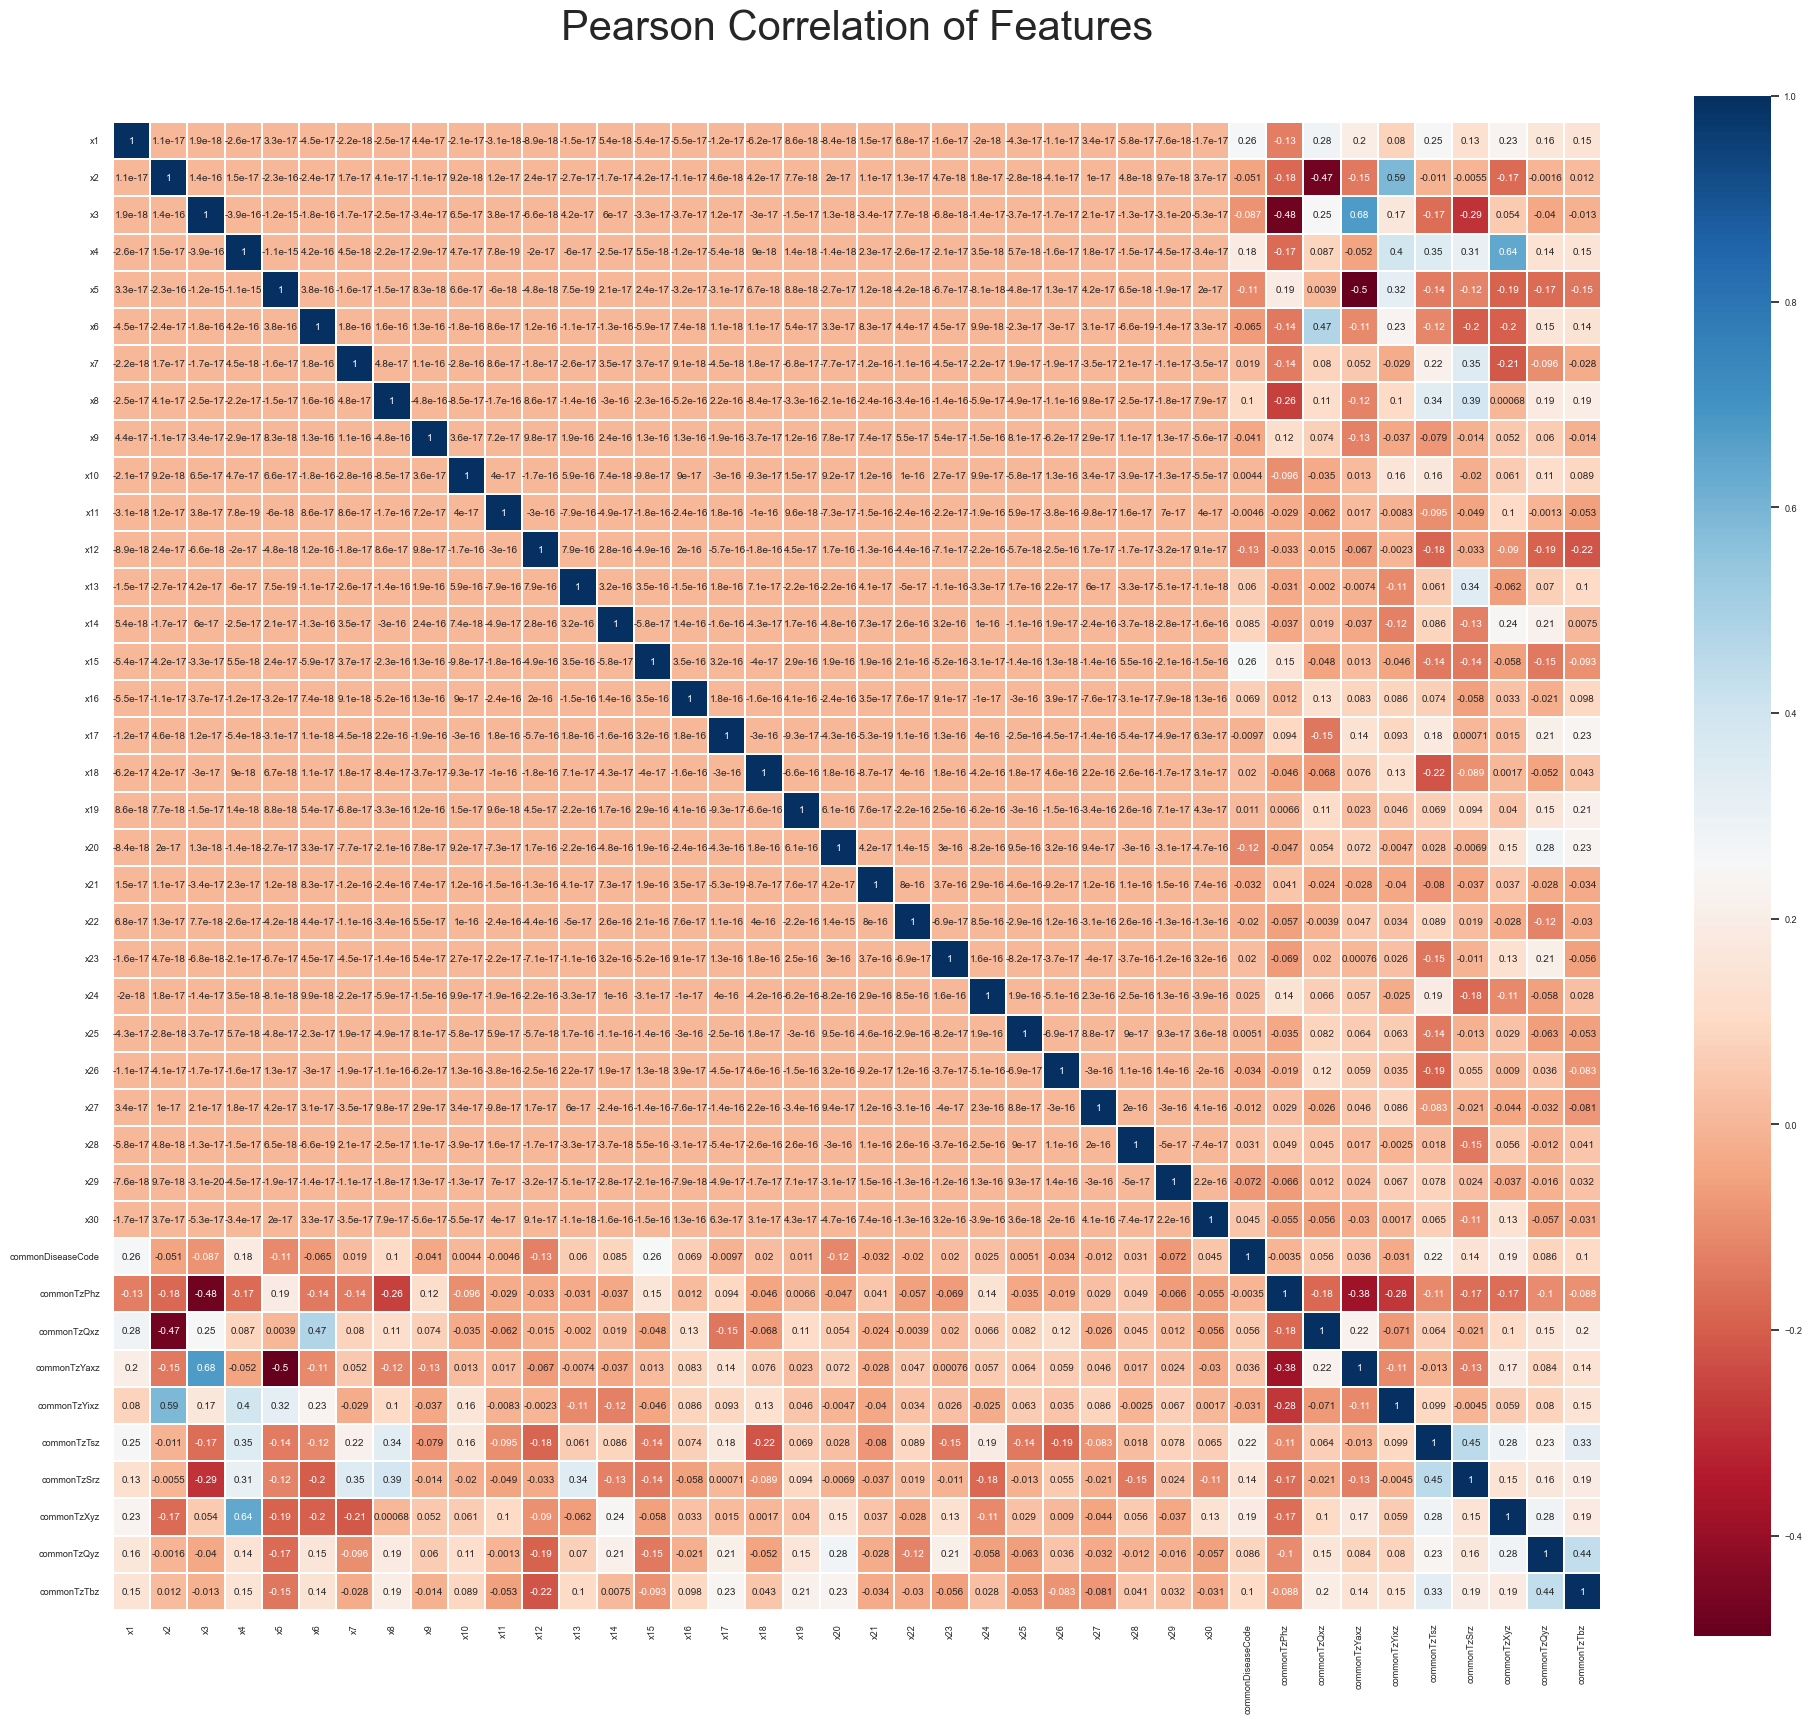

In [98]:
# 再次制作热图
colormap = plt.cm.RdBu
plt.figure(figsize=(24,20))
plt.title('Pearson Correlation of Features',y=1.05,size=30)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
sns.set(font_scale=0.6)
plt.show()
#降维后我们可以明显看出各特征x和标签y的相关性，而x之间及y之间相对独立

In [99]:
# 使用逻辑回归计算各特征对应每个标签的相关性并排序
logreg = LogisticRegression()
logreg.fit(x_train,y_train['commonDiseaseCode'])
coeff_df = pd.DataFrame(pca_x_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation_y0"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation_y0',ascending=False)
print(coeff_df.to_string(index=False))

Feature  Correlation_y0
     x2        0.633869
     x3       -0.925406
     x4        0.582767
     x5       -0.107727
     x6        0.000000
     x7        0.053837
     x8        0.000000
     x9       -0.067781
    x10        0.254352
    x11        0.087214
    x12       -0.131294
    x13       -0.110085
    x14        0.228729
    x15        0.297806
    x16        0.288435
    x17       -0.377637
    x18        0.102240
    x19       -0.057570
    x20        0.252530
    x21       -0.132321
    x22       -0.200378
    x23       -0.076389
    x24       -0.328557
    x25       -0.245665
    x26        0.568260
    x27       -0.678692
    x28       -0.036442
    x29        0.302868
    x30       -0.417000


In [100]:
# 读取训练模型
def read_model(name):
    f = open('./models/'+name+'.pickle','rb')
    s = f.read()
    model = pickle.loads(s)
    return model

In [101]:
def train_acc(name):
    model = read_model(name)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(accuracy_score(y_test,y_pred)*100,5)
    print(name,acc)
    #print(y_pred)
    return model, acc

In [109]:
#logreg,acc_logreg = train_acc('model_logreg')
#svc,acc_svc = train_acc('model_SVM')
#gaussian,acc_gaussian = train_acc('model_Gaussian')
#perceptron,acc_perceptron = train_acc('model_Perceptron')
#linear,acc_linear = train_acc('model_LinearSVM|')
# sgd,acc_sgd = train_acc('model_SGD')
# ---------由于我们是多标签任务，有一些方法不再适用-----------------
knn,acc_knn = train_acc('model_KNN')
decision,acc_decision = train_acc('model_DecisionTree')
forest,acc_forest = train_acc('model_RandomForest')
kfold,acc_kfold = train_acc('model_kFold')

model_KNN 57.39437
model_DecisionTree 49.29577
model_RandomForest 59.85915
model_kFold 44.01408


多批次训练随机森林模型，继续提高其准确性

# 深度学习

In [112]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义模型
class MultiLabelClassifier(nn.Module):
    def __init__(self, input_size, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.linear = nn.Linear(input_size, num_labels)
        
    def forward(self, x):
        return self.linear(x)

# 初始化模型
input_size = len(x_train.columns)  # 输入特征的维度
num_labels = len(y_train.columns)  # 标签的数量
model = MultiLabelClassifier(input_size, num_labels)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 转换数据为PyTorch张量
x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)

# 训练模型
num_epochs = 200
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # 计算准确率
    predicted_labels = (torch.sigmoid(outputs) > 0.5).float()  # 使用阈值0.5确定标签
    accuracy = (predicted_labels == y_train_tensor).float().mean()
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%')

# 模型训练完成，可以使用模型进行预测

Epoch [1/200], Loss: 0.7487, Accuracy: 42.53%
Epoch [2/200], Loss: 0.7132, Accuracy: 49.32%
Epoch [3/200], Loss: 0.6802, Accuracy: 54.89%
Epoch [4/200], Loss: 0.6498, Accuracy: 60.30%
Epoch [5/200], Loss: 0.6220, Accuracy: 67.55%
Epoch [6/200], Loss: 0.5965, Accuracy: 72.97%
Epoch [7/200], Loss: 0.5734, Accuracy: 76.74%
Epoch [8/200], Loss: 0.5525, Accuracy: 80.18%
Epoch [9/200], Loss: 0.5336, Accuracy: 81.56%
Epoch [10/200], Loss: 0.5166, Accuracy: 81.75%
Epoch [11/200], Loss: 0.5013, Accuracy: 81.78%
Epoch [12/200], Loss: 0.4876, Accuracy: 81.77%
Epoch [13/200], Loss: 0.4753, Accuracy: 81.77%
Epoch [14/200], Loss: 0.4642, Accuracy: 81.76%
Epoch [15/200], Loss: 0.4541, Accuracy: 81.76%
Epoch [16/200], Loss: 0.4450, Accuracy: 81.76%
Epoch [17/200], Loss: 0.4367, Accuracy: 81.77%
Epoch [18/200], Loss: 0.4292, Accuracy: 81.78%
Epoch [19/200], Loss: 0.4223, Accuracy: 81.79%
Epoch [20/200], Loss: 0.4159, Accuracy: 81.82%
Epoch [21/200], Loss: 0.4100, Accuracy: 81.91%
Epoch [22/200], Loss: 

In [113]:
# 保存训练完成的模型
torch.save(model.state_dict(), 'trained_model.pth')
# 加载已保存的模型
#loaded_model = MultiLabelClassifier(input_size, num_labels)
#loaded_model.load_state_dict(torch.load('trained_model.pth'))
#loaded_model.eval()  # 设置模型为评估模式

FileNotFoundError: [Errno 2] No such file or directory: 'trained_model.pth'